#### BUSINESS CHALLENGE
Company ABC is a start-up company which makes herbs from different types of plants and its leaves. Currently the system they use to classify the trees which they import in a batch is quite manual. A labourer from his experience decides the leaf type and subtype of plant family. They have asked us to automate this process and remove any manual intervention from this process.

Objective: To classify the plant leaves by various classifiers from different metrics of the leaves and to choose the best classifier for future reference

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [12]:
train.head(2)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.0,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.0,0.001953,0.011719,0.009766,0.041016,...,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.02832,0.0,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.0,0.0,0.006836,0.037109,0.007812,0.0,0.00293,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.0,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.0,0.000000,0.003906,0.013672,0.033203,...,0.050781,0.001953,0.021484,0.003906,0.027344,0.023438,0.06250,0.0,0.038086,0.000000,0.019531,0.0,0.001953,0.003906,0.015625,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.0,0.0,0.053711,0.036133,0.000977,0.0,0.00000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461


In [13]:
def encode(train,test):
  le = LabelEncoder().fit(train.species)
  labels = le.transform(train.species)
  classes = list(le.classes_)
  test_ids = test.id
  train = train.drop(['id','species'],axis=1)
  test = test.drop(['id'],axis=1)

  return train,labels,test,test_ids,classes

In [14]:
train,labels,test,test_ids,classes = encode(train,test)
train.head(2)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.0,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.0,0.001953,0.011719,0.009766,0.041016,0.037109,0.019531,...,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.02832,0.0,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.0,0.0,0.006836,0.037109,0.007812,0.0,0.00293,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.0,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.0,0.000000,0.003906,0.013672,0.033203,0.033203,0.019531,...,0.050781,0.001953,0.021484,0.003906,0.027344,0.023438,0.06250,0.0,0.038086,0.000000,0.019531,0.0,0.001953,0.003906,0.015625,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.0,0.0,0.053711,0.036133,0.000977,0.0,0.00000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461


In [22]:
stData = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=20)
# stData.n_splits(train,labels)

for train_index, test_index in stData.split(train, labels):
  X_train, X_test = train.values[train_index], train.values[test_index]
  y_train, y_test = labels[train_index] , labels[test_index]

In [24]:
from sklearn.metrics import log_loss, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [25]:
classifer = [
             KNeighborsClassifier(n_neighbors=3),
             SVC(kernel='rbf',C=0.025,probability=True),
             NuSVC(probability=True),
             DecisionTreeClassifier(),
             RandomForestClassifier(),
             GaussianNB()]

In [26]:
log_cols = ['Classifier','Accuracy','Log_loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifer:
  clf.fit(X_train,y_train)
  name = clf.__class__.__name__

  print('='*10)
  print(name)

  print("====Results===")
  train_predictions = clf.predict(X_test)
  acc = accuracy_score(y_test,train_predictions)
  print("Accuracy: {:.4%}".format(acc))

  train_predictions = clf.predict_proba(X_test)
  lglo = log_loss(y_test,train_predictions)
  print("log loss: {}".format(lglo))

  log_entry = pd.DataFrame([[name,acc*100, lglo]],columns=log_cols)
  log = log.append(log_entry)

print("="*20)


KNeighborsClassifier
====Results===
Accuracy: 88.3838%
log loss: 1.2535156423707683
SVC
====Results===
Accuracy: 82.3232%
log loss: 4.696020025580767
NuSVC
====Results===
Accuracy: 91.9192%
log loss: 2.409503985134986
DecisionTreeClassifier
====Results===
Accuracy: 62.6263%
log loss: 12.908431581936416
RandomForestClassifier
====Results===
Accuracy: 97.4747%
log loss: 0.782992303977105
GaussianNB
====Results===
Accuracy: 64.6465%
log loss: 12.21067852345656


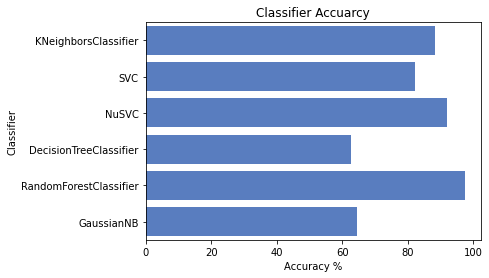

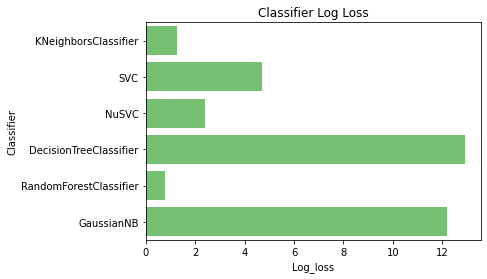

In [30]:
sns.set_color_codes("muted")
sns.barplot(x="Accuracy",y="Classifier",data=log,color='b')

plt.xlabel("Accuracy %")
plt.title("Classifier Accuarcy")
plt.show()

sns.set_color_codes("muted")
sns.barplot(x="Log_loss",y="Classifier",data=log,color='g')

plt.xlabel("Log_loss")
plt.title("Classifier Log Loss")
plt.show()


Random Forest is giving best accuracy

In [33]:
#Testing on test.csv
rn_clf = classifer[4]
rn_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
test_predictions = rn_clf.predict(test)

In [39]:
test_predictions

array([51, 50,  1, 19, 14,  3,  3, 28, 84,  8, 43, 74, 75, 10, 52, 46, 45,
       73, 13, 71, 61, 68, 57, 77,  1, 70, 28, 15, 35, 70, 53, 74, 47, 50,
        4, 36, 14, 55, 36, 93,  8, 32,  8,  9, 71, 70, 38, 23, 94, 18, 17,
        5, 55, 94, 14, 86, 62, 33, 51, 98, 88, 56, 21, 59, 65, 11, 48,  5,
       13,  4, 54, 57, 29,  7, 31, 98, 92, 84, 25, 10, 61, 43, 85, 24,  1,
        2, 23, 83, 40, 22, 48, 90, 25, 21, 37, 56, 41, 95,  7, 89, 98, 77,
        3, 12, 31, 84, 53, 96, 64, 72, 93, 93, 67, 30,  8, 88, 60, 87,  6,
       57, 34, 90, 60, 17, 75, 27, 51, 31, 39, 23, 29,  2, 41, 61, 24, 97,
       29, 28, 68, 81, 42, 51, 86, 62, 60, 52, 95, 64, 42, 96, 95, 20, 59,
       35, 86,  1, 26, 38, 43, 75, 20, 60, 46, 79, 22, 79, 55, 87, 54, 97,
       75, 21, 29, 21, 11, 10, 58, 94, 27, 22, 15, 45, 89, 54, 43,  5, 23,
       94, 40, 49, 89, 72, 36, 11, 81, 95, 18, 91, 29, 64, 80,  6, 78, 45,
       28,  9, 78, 90, 44, 89, 92, 13,  2, 59,  0, 96, 70, 32, 29, 78, 91,
       55, 44, 38,  5, 60